# Section 0
- Submission Date : 10/11/2024
- QPM 2024-2025: Assignment 2
- Members :
ESCATO Ugo  
HERVE Gauthier  
KAEPPELIN Teodor  
MEDDEB Malek  
CAO Yu
- Diversity :
1. Academic background : some did prepa, others went to univerisity,
2. Nationality : French, Chinese, Tunisian
3. Python : some very familiar with Python and machine learning, others not at all

# Section 1

## Question 1 of Assignment 2

### Question 1.1

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Downloading S&P 500 table 
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
SP500_table = tables[0]
SP500_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [3]:
# Tickers and date range
tickers = ["MMM","AOS","ABT","ADM","ADBE","ADP","AES","AFL","A","AKAM"]
start_date = "2000-01-01"
end_date = "2022-12-31"

In [4]:
# Download data and process price data
dataset = yf.download(tickers, start=start_date, end=end_date)
dataset_prices = dataset['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [5]:
dataset_prices.isnull().sum()

Ticker
A       0
ABT     0
ADBE    0
ADM     0
ADP     0
AES     0
AFL     0
AKAM    0
AOS     0
MMM     0
dtype: int64

In [6]:
# Convert to monthly frequency and compute returns
monthly_prices = dataset_prices.resample('M').last()
monthly_returns = monthly_prices.pct_change().dropna()

In [7]:
monthly_returns.head()

Ticker,A,ABT,ADBE,ADM,ADP,AES,AFL,AKAM,AOS,MMM
Date,,,,,,,,,,
2000-02-29 00:00:00+00:00,0.569405,0.013436,0.852441,-0.140034,-0.081686,0.046022,-0.156654,0.048670,-0.126583,-0.051976
2000-03-31 00:00:00+00:00,0.001203,0.066288,0.091567,0.024845,0.109850,-0.060402,0.246154,-0.384450,0.043478,0.004252
2000-04-30 00:00:00+00:00,-0.147837,0.097843,0.086468,-0.036364,0.115285,0.142063,0.071331,-0.385154,0.149574,-0.021877
2000-05-31 00:00:00+00:00,-0.169252,0.058536,-0.069251,0.207111,0.022067,-0.029882,0.060746,-0.324905,0.021277,-0.003685
2000-06-30 00:00:00+00:00,0.001698,0.095238,0.155146,-0.178011,-0.024648,0.045845,-0.111246,0.778792,-0.003721,-0.032070


In [8]:
# Assume risk-free rate (rf) is 0
rf = 0

In [9]:
# Assume gamma is 5
gamma = 5

### Question 1.2

### a)

In [10]:
t_est = 60
nb_months = len(monthly_returns)
estimation_sample = monthly_returns.head(t_est)

In [1]:
mean_returns = estimation_sample.mean()
cov_matrix = estimation_sample.cov()

NameError: name 'estimation_sample' is not defined

In [12]:
def MVP(gamma, rf, V, mu):
    """
    Calculate the weights of the mean-variance portfolio (MVP), 
    the weight in the risk-free asset, and the weights of the tangency portfolio.

    Parameters:
    - gamma (float): Investor's risk aversion parameter
    - rf (float): Gross risk-free rate
    - V (ndarray): Variance-covariance matrix of returns
    - mu (ndarray): Column vector of gross mean returns

    Returns:
    - w_mvp (ndarray): Weights of the mean-variance portfolio (MVP)
    - w_riskFree (float): Weight in the risk-free asset
    - w_tangency (ndarray): Weights of the tangency portfolio
    """
    # Ensure mu is a numpy array with appropriate shape
    mu = np.array(mu).reshape(-1, 1)
    
    # Column vector of ones
    ones = np.ones((mu.shape[0], 1))
    
    # Inverse of the variance-covariance matrix
    Vinverse = np.linalg.inv(V)
    
    # Weights for the mean-variance portfolio (MVP)
    w_mvp = (1 / gamma) * Vinverse @ (mu - rf * ones)
    
    # Weight in the risk-free asset
    w_riskFree = 1 - ones.T @ w_mvp
    
    # Weights of the tangency portfolio
    w_tangency = w_mvp / (ones.T @ w_mvp)
    
    return w_mvp, w_riskFree, w_tangency

In [13]:
w_mvp, w_riskFree, w_tangency = MVP(gamma, rf, estimation_sample_cov_matrix, estimation_sample_mean_returns)

print("\nMVP Weights: ")
print(w_tangency)


MVP Weights: 
[[-0.17981723]
 [ 0.2360792 ]
 [ 0.27047057]
 [ 0.40332097]
 [-0.25064097]
 [ 0.03804252]
 [ 0.02403408]
 [-0.00198308]
 [ 0.15348886]
 [ 0.30700508]]


### b)

In [14]:
def GMV(V):
    """
    Calculate the weights of the global minimum variance (GMV) portfolio.

    Parameters:
    - V (ndarray): Variance-covariance matrix of returns

    Returns:
    - w_gmv (ndarray): Weights of the global minimum variance (GMV) portfolio
    """
    # Column vector of ones
    ones = np.ones((V.shape[0], 1))
    
    # Inverse of the variance-covariance matrix
    Vinverse = np.linalg.inv(V)
    
    # Weights of the global minimum variance (GMV) portfolio
    w_gmv = (Vinverse @ ones) / (ones.T @ Vinverse @ ones)
    
    return w_gmv

In [15]:
w_gmv = GMV(estimation_sample_cov_matrix)

print("\nGMV Portfolio Weights: ")
print(w_gmv)


GMV Portfolio Weights: 
[[ 0.0048523 ]
 [ 0.30442601]
 [ 0.03010857]
 [ 0.05513059]
 [ 0.08595176]
 [ 0.02137053]
 [ 0.07924228]
 [-0.02227754]
 [ 0.1043002 ]
 [ 0.33689531]]


### Question 1.3

In [16]:
mvp_weights = []
gmv_weights = []

for i in range(t_est, nb_months):
    # Define the rolling window estimation sample
    estimation_sample_rolling = monthly_returns.iloc[i - t_est:i]
    
    # Calculate mean returns and covariance matrix for the rolling window
    estimation_sample_rolling_mean_returns = estimation_sample_rolling.mean()
    estimation_sample_rolling_cov_matrix = estimation_sample_rolling.cov()
    
    # Get the MVP weights 
    mvp_weight = MVP(5, rf, estimation_sample_rolling_cov_matrix, estimation_sample_rolling_mean_returns)[2].flatten()
    
    # Get the GMV weights and flatten them 
    gmv_weight = GMV(estimation_sample_rolling_cov_matrix)
    gmv_weight_flat = gmv_weight.flatten()  # Flatten to ensure it's 1D
    
    # Append the weights to the respective lists
    mvp_weights.append(mvp_weight)
    gmv_weights.append(gmv_weight_flat)

# Create DataFrames with the weights and dates
dates = monthly_returns.index[t_est:]
mvp_weights_df = pd.DataFrame(mvp_weights, index=dates, columns=estimation_sample.columns)
gmv_weights_df = pd.DataFrame(gmv_weights, index=dates, columns=estimation_sample.columns)

In [17]:
print("MVP Weights (based on 60 Months Rolling Window):")
print(mvp_weights_df.head())
print("\nGMV Weights (based on 60 Months Rolling Window):")
print(gmv_weights_df.head())

MVP Weights (based on 60 Months Rolling Window):
Ticker                            A       ABT      ADBE       ADM       ADP  \
Date                                                                          
2005-02-28 00:00:00+00:00 -0.179817  0.236079  0.270471  0.403321 -0.250641   
2005-03-31 00:00:00+00:00 -0.181398  0.227714  0.162405  0.351974 -0.162817   
2005-04-30 00:00:00+00:00 -0.234816  0.217776  0.205942  0.412998 -0.195132   
2005-05-31 00:00:00+00:00 -0.189431  0.302908  0.119813  0.259169 -0.217460   
2005-06-30 00:00:00+00:00 -0.179272  0.276223  0.138794  0.269250 -0.247066   

Ticker                          AES       AFL      AKAM       AOS       MMM  
Date                                                                         
2005-02-28 00:00:00+00:00  0.038043  0.024034 -0.001983  0.153489  0.307005  
2005-03-31 00:00:00+00:00  0.043949  0.069104  0.003500  0.158996  0.326572  
2005-04-30 00:00:00+00:00  0.053827 -0.067533  0.016559  0.184817  0.405561  
2005-05

### Question 1.4

In [18]:
mvp_returns = []
gmv_returns = []

for t in range(0, len(mvp_weights_df)):
    next_month_returns = monthly_returns.iloc[t + t_est]
    mvp_return = np.dot(mvp_weights_df.iloc[t], next_month_returns)
    gmv_return = np.dot(gmv_weights_df.iloc[t], next_month_returns)
    mvp_returns.append(mvp_return)
    gmv_returns.append(gmv_return)

# Adjust out-of-sample dates to align with the returns computation
out_of_sample_dates = monthly_returns.index[t_est:]
mvp_returns_df = pd.DataFrame(mvp_returns, index=out_of_sample_dates, columns=['MVP_Return'])
gmv_returns_df = pd.DataFrame(gmv_returns, index=out_of_sample_dates, columns=['GMV_Return'])

In [19]:
print("Out-of-Sample Returns for MVP (using the 60 Months Rolling Window Weights):")
print(mvp_returns_df.head())
print("\nOut-of-Sample Returns for GMV (using the 60 Months Rolling Window Weights):")
print(gmv_returns_df.head())

Out-of-Sample Returns for MVP (using the 60 Months Rolling Window Weights):
                           MVP_Return
Date                                 
2005-02-28 00:00:00+00:00    0.017746
2005-03-31 00:00:00+00:00    0.050020
2005-04-30 00:00:00+00:00   -0.152551
2005-05-31 00:00:00+00:00    0.028179
2005-06-30 00:00:00+00:00   -0.018200

Out-of-Sample Returns for GMV (using the 60 Months Rolling Window Weights):
                           GMV_Return
Date                                 
2005-02-28 00:00:00+00:00    0.010781
2005-03-31 00:00:00+00:00    0.023530
2005-04-30 00:00:00+00:00   -0.010159
2005-05-31 00:00:00+00:00    0.005719
2005-06-30 00:00:00+00:00   -0.022051


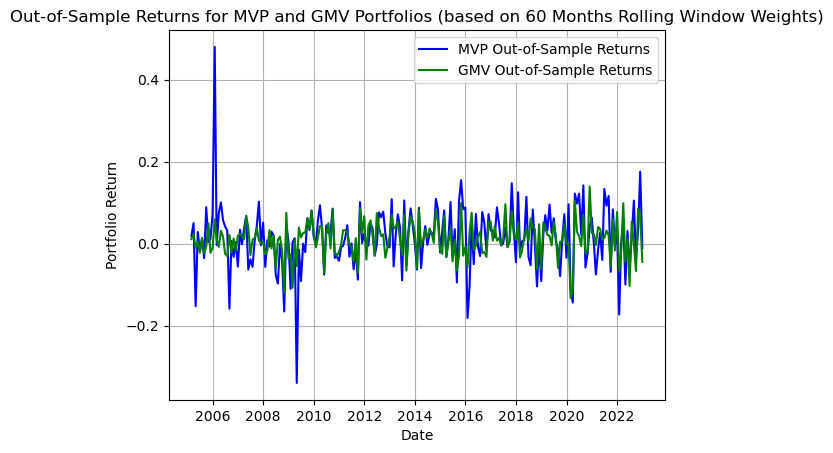

In [20]:
plt.plot(mvp_returns_df.index, mvp_returns_df, label="MVP Out-of-Sample Returns", color="blue")
plt.plot(gmv_returns_df.index, gmv_returns_df, label="GMV Out-of-Sample Returns", color="green")

plt.title("Out-of-Sample Returns for MVP and GMV Portfolios (based on 60 Months Rolling Window Weights)")
plt.xlabel("Date")
plt.ylabel("Portfolio Return")
plt.legend()
plt.grid()
plt.show()

### Question 1.5

In [21]:
def sharpe_ratio(returns_df):
    avg_monthly_return = returns_df.mean().iloc[0]
    std_dev_monthly_return = returns_df.std().iloc[0]
    annualized_return = (1 + avg_monthly_return) ** 12 - 1
    annualized_volatility = std_dev_monthly_return * np.sqrt(12)
    return (annualized_return - rf) / annualized_volatility

In [22]:
mvp_sharpe_ratio = sharpe_ratio(mvp_returns_df)
gmv_sharpe_ratio = sharpe_ratio(gmv_returns_df)

In [23]:
print("Sharpe Ratio for MVP:", mvp_sharpe_ratio)
print("Sharpe Ratio for GMV:", gmv_sharpe_ratio)

if mvp_sharpe_ratio > gmv_sharpe_ratio:
    print("MVP has the higher Sharpe ratio.")
else:
    print("GMV has the higher Sharpe ratio.")

Sharpe Ratio for MVP: 0.6684141008058265
Sharpe Ratio for GMV: 0.8999533326318012
GMV has the higher Sharpe ratio.


# Section 2

## Question 2 of Assignment 2

### Question 2.1

In [24]:
def MVP_C(mu, V, rf, gamma):
    # Convert mu to an array 
    mu = np.array(mu)

    # Number of assets
    n_assets = len(mu)

    # Define the objective function to be minimized
    def objective(weights):
        # Ensure weights are numpy arrays
        weights = np.array(weights)
        portfolio_return = weights.T @ (mu - rf * np.ones(n_assets))
        portfolio_risk = weights.T @ V @ weights
        return (gamma / 2) * portfolio_risk - portfolio_return

    # Initial guess for weights (equal distribution)
    initial_weights = np.ones(n_assets) / n_assets

    # Bounds for weights: no short-selling (all weights >= 0)
    bounds = tuple((0, None) for _ in range(n_assets))  # no upper bound on weights

    # Perform the minimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds)

    # Check if the optimization was successful
    if result.success:
        optimal_weights = result.x
    else:
        raise ValueError("Optimization failed")

    # Weights in the risk-free asset (total weight should sum to 1)
    w_riskFree = 1 - np.sum(optimal_weights)

    # Tangency portfolio weights (scaled)
    w_tangency = optimal_weights / np.sum(optimal_weights)

    # Formatting the output weights to 6 decimal places
    w_mvp_shortsaleConstrained = [format(num, '.6f') for num in optimal_weights]
    w_tangency_formatted = [format(num, '.6f') for num in w_tangency]

    return w_mvp_shortsaleConstrained, w_riskFree, w_tangency_formatted

In [25]:
w_mvp, w_riskFree, w_tangency = MVP_C(estimation_sample_mean_returns, estimation_sample_cov_matrix, rf, gamma)

print("\nWeights of the tangency portfolio (based on MVP) are: ")
print(w_tangency)


Weights of the tangency portfolio (based on MVP) are: 
['0.000000', '0.209290', '0.115171', '0.248244', '0.000000', '0.002534', '0.099560', '0.000000', '0.100912', '0.224289']


In [26]:
def GMV_C(cov_matrix, initial_weights=None, bounds=None, constraints=None):
    """
    Optimize the portfolio weights given the covariance matrix and constraints.

    Parameters:
    - cov_matrix (numpy.ndarray): Covariance matrix of asset returns.
    - initial_weights (numpy.ndarray, optional): Initial guess for the weights (defaults to equal weights).
    - bounds (tuple, optional): Bounds for each weight (defaults to no upper bound, and lower bound of 0).
    - constraints (dict, optional): Constraints for the optimization (defaults to weights sum to 1).

    Returns:
    - numpy.ndarray: Optimal portfolio weights.
    """
    # Default values for initial guess, bounds, and constraints if not provided
    if initial_weights is None:
        initial_weights = np.ones(len(cov_matrix)) / len(cov_matrix)
    if bounds is None:
        bounds = tuple((0, 1) for _ in range(len(cov_matrix)))  # Weight bounds: 0 <= weight <= 1
    if constraints is None:
        constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Weights sum to 1

    # Define the objective function to minimize (portfolio variance)
    def objective(weights, V):
        return weights.T @ V @ weights  # Portfolio variance

    # Find the optimal weights
    result = minimize(objective, initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    # Check if the optimization was successful and return the optimal weights
    if result.success:
        return result.x
    else:
        raise ValueError("Optimization failed: " + result.message)

In [27]:
optimal_weights = GMV_C(estimation_sample_cov_matrix)
print("GMV-C Optimal Weights:")
for weight in optimal_weights:
    print(f"{weight:.6f}")

GMV-C Optimal Weights:
0.000000
0.307745
0.031412
0.063760
0.079486
0.007760
0.125798
0.000000
0.092293
0.291746


### Question 2.2

In [28]:
mvp_weights = []
gmv_weights = []

for i in range(t_est, nb_months):
    # Define the rolling window estimation sample
    estimation_sample_rolling = monthly_returns.iloc[i - t_est:i]
    
    # Calculate mean returns and covariance matrix for the rolling window
    estimation_sample_rolling_mean_returns = estimation_sample_rolling.mean()
    estimation_sample_rolling_cov_matrix = estimation_sample_rolling.cov()
    
    # Get the MVP weights
    mvp_weight = MVP_C(estimation_sample_rolling_mean_returns, estimation_sample_rolling_cov_matrix, 0, 5)[2]
    
    # Get the GMV weights and flatten them 
    gmv_weight = GMV_C(estimation_sample_rolling_cov_matrix)
    gmv_weight_flat = gmv_weight.flatten()  # Flatten to ensure it's 1D
    
    # Append the weights to the respective lists
    mvp_weights.append(mvp_weight)
    gmv_weights.append(gmv_weight_flat)

# Create DataFrames with the weights and dates
dates = monthly_returns.index[t_est:]
mvp_weights_df = pd.DataFrame(mvp_weights, index=dates, columns=estimation_sample.columns)
gmv_weights_df = pd.DataFrame(gmv_weights, index=dates, columns=estimation_sample.columns)

In [29]:
print("MVP-C Weights (based on 60 Months Rolling Window):")
print(mvp_weights_df.head())
print("\nGMV-C Weights (based on 60 Months Rolling Window):")
print(gmv_weights_df.head())

MVP-C Weights (based on 60 Months Rolling Window):
Ticker                            A       ABT      ADBE       ADM       ADP  \
Date                                                                          
2005-02-28 00:00:00+00:00  0.000000  0.209290  0.115171  0.248244  0.000000   
2005-03-31 00:00:00+00:00  0.000000  0.229756  0.005337  0.216439  0.000000   
2005-04-30 00:00:00+00:00  0.000000  0.227789  0.017044  0.236353  0.000000   
2005-05-31 00:00:00+00:00  0.000000  0.269321  0.000000  0.136901  0.000000   
2005-06-30 00:00:00+00:00  0.000000  0.248835  0.000000  0.125186  0.000000   

Ticker                          AES       AFL      AKAM       AOS       MMM  
Date                                                                         
2005-02-28 00:00:00+00:00  0.002534  0.099560  0.000000  0.100912  0.224289  
2005-03-31 00:00:00+00:00  0.018906  0.159831  0.000000  0.105468  0.264265  
2005-04-30 00:00:00+00:00  0.023495  0.069989  0.000000  0.117391  0.307938  
2005-

### Question 2.3

In [30]:
mvp_returns = []
gmv_returns = []

# Loop through the weights DataFrame, starting from the first index
for t in range(0, len(mvp_weights_df)):
    # Select the next month's returns
    next_month_returns = monthly_returns.iloc[t + t_est].astype(float)
    
    # Convert both DataFrame rows to numpy arrays of floats for np.dot compatibility
    mvp_weight_array = mvp_weights_df.iloc[t].astype(float).values
    gmv_weight_array = gmv_weights_df.iloc[t].astype(float).values

    # Calculate portfolio returns
    mvp_return = np.dot(mvp_weight_array, next_month_returns.values)
    gmv_return = np.dot(gmv_weight_array, next_month_returns.values)
    
    # Append the calculated returns to the lists
    mvp_returns.append(mvp_return)
    gmv_returns.append(gmv_return)

# Adjust out-of-sample dates to align with the returns computation
out_of_sample_dates = monthly_returns.index[t_est:]
mvp_returns_df = pd.DataFrame(mvp_returns, index=out_of_sample_dates, columns=['MVP_Return'])
gmv_returns_df = pd.DataFrame(gmv_returns, index=out_of_sample_dates, columns=['GMV_Return'])

In [31]:
print("Out-of-Sample Returns for MVP:")
print(mvp_returns_df.head())
print("\nOut-of-Sample Returns for GMV:")
print(gmv_returns_df.head())

Out-of-Sample Returns for MVP:
                           MVP_Return
Date                                 
2005-02-28 00:00:00+00:00    0.008853
2005-03-31 00:00:00+00:00    0.018963
2005-04-30 00:00:00+00:00   -0.079567
2005-05-31 00:00:00+00:00    0.027102
2005-06-30 00:00:00+00:00   -0.015142

Out-of-Sample Returns for GMV:
                           GMV_Return
Date                                 
2005-02-28 00:00:00+00:00    0.003562
2005-03-31 00:00:00+00:00    0.021150
2005-04-30 00:00:00+00:00   -0.013300
2005-05-31 00:00:00+00:00    0.017494
2005-06-30 00:00:00+00:00   -0.014618


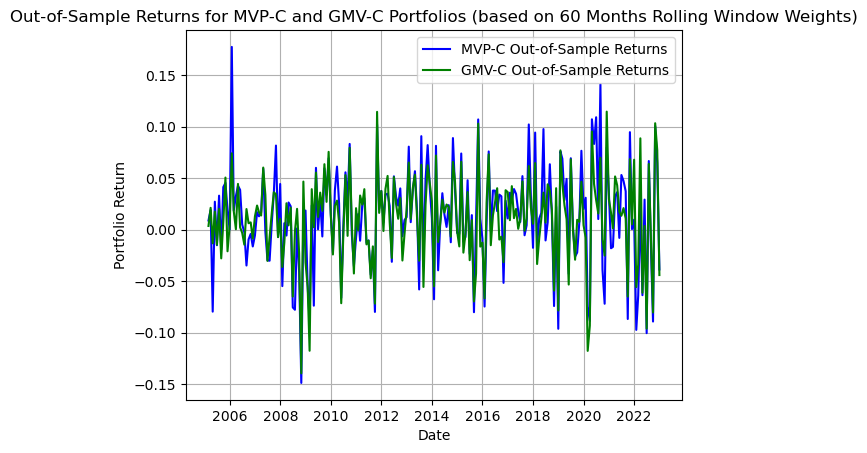

In [32]:
plt.plot(mvp_returns_df.index, mvp_returns_df, label="MVP-C Out-of-Sample Returns", color="blue")
plt.plot(gmv_returns_df.index, gmv_returns_df, label="GMV-C Out-of-Sample Returns", color="green")

plt.title("Out-of-Sample Returns for MVP-C and GMV-C Portfolios (based on 60 Months Rolling Window Weights)")
plt.xlabel("Date")
plt.ylabel("Portfolio Return")
plt.legend()
plt.grid()
plt.show()

### Question 2.4

In [33]:
mvp_c_sharpe_ratio = sharpe_ratio(mvp_returns_df)
gmv_c_sharpe_ratio = sharpe_ratio(gmv_returns_df)

In [34]:
print("Sharpe Ratio for MVP-C:", mvp_c_sharpe_ratio)
print("Sharpe Ratio for GMV-C:", gmv_c_sharpe_ratio)

if mvp_c_sharpe_ratio > gmv_c_sharpe_ratio:
    print("MVP-C has the higher Sharpe ratio.")
else:
    print("GMV-C has the higher Sharpe ratio.")

Sharpe Ratio for MVP-C: 0.9193728328226161
Sharpe Ratio for GMV-C: 0.9108990514002411
MVP-C has the higher Sharpe ratio.


### Question 2.5

In [35]:
print("Sharpe Ratio for MVP")
print(mvp_sharpe_ratio)
print("Sharpe Ratio for GMV")
print(gmv_sharpe_ratio)
print("Sharpe Ratio for MVP-C")
print(mvp_c_sharpe_ratio)
print("Sharpe Ratio for GMV-C")
print(gmv_c_sharpe_ratio)

Sharpe Ratio for MVP
0.6684141008058265
Sharpe Ratio for GMV
0.8999533326318012
Sharpe Ratio for MVP-C
0.9193728328226161
Sharpe Ratio for GMV-C
0.9108990514002411


The MVP-C (Mean-Variance Portfolio with constraints) achieves the highest Sharpe ratio at 0.9194, closely followed by the GMV-C at 0.9109. Both constrained portfolios have higher Sharpe ratios than their unconstrained counterparts, indicating that the nonnegativity constraints enhance risk-adjusted performance by reducing exposure to volatile short positions. The similarity in Sharpe ratios between GMV-C and MVP-C suggests that adding constraints improves stability and diversification across both strategies, but the MVP-C slightly outperforms by balancing risk and return more effectively.